Use the red_wine dataset. This dataset is related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

You will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features predict the quality of the wine.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing balance dataset
winered_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Winequality-red.csv')

In [3]:
winered_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
winered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
winered_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
winered_df.shape

(1599, 12)

In [7]:
#checking for null values in the dataset
winered_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#extracting features and target dataframe from the dataset
feature_df=winered_df.iloc[:,0:11].values
target_df=winered_df.iloc[:,11].values

In [9]:
feature_df.shape

(1599, 11)

In [10]:
target_df.shape

(1599,)

In [11]:
#standardising the features of the dataset
from sklearn.preprocessing import StandardScaler
n=StandardScaler()
feature_df=n.fit_transform(feature_df)

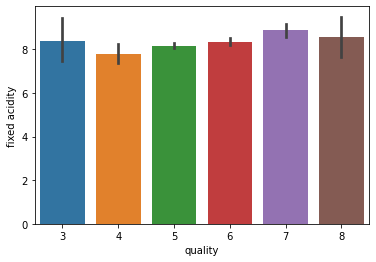

In [12]:
sns.barplot(x='quality', y='fixed acidity', data=winered_df)

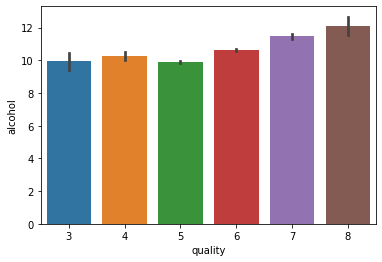

In [13]:
sns.barplot(x='quality', y='alcohol', data=winered_df)

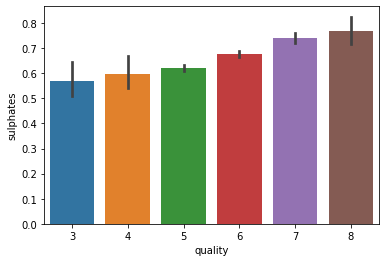

In [14]:
sns.barplot(x='quality', y='sulphates', data=winered_df)

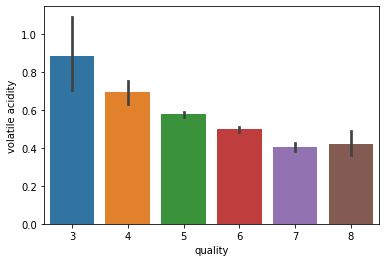

In [15]:
sns.barplot(x='quality', y='volatile acidity', data=winered_df)

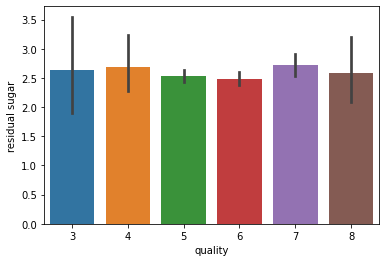

In [16]:
sns.barplot(x='quality', y='residual sugar', data=winered_df)

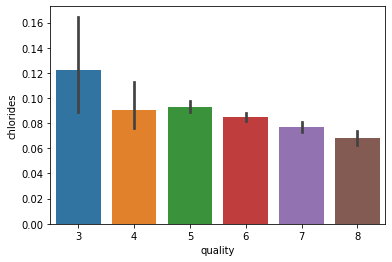

In [17]:
sns.barplot(x='quality', y='chlorides', data=winered_df)

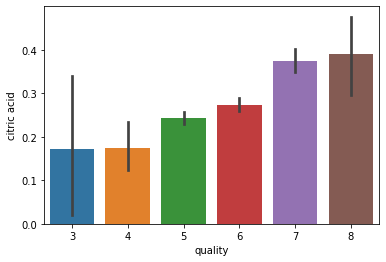

In [18]:
sns.barplot(x='quality', y='citric acid', data=winered_df)

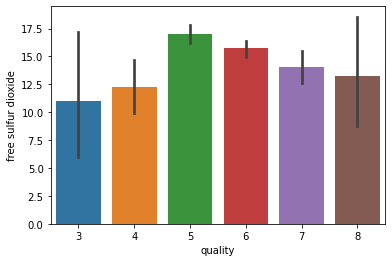

In [19]:
sns.barplot(x='quality', y='free sulfur dioxide', data=winered_df)

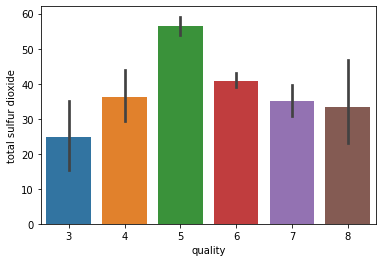

In [20]:
sns.barplot(x='quality', y='total sulfur dioxide', data=winered_df)

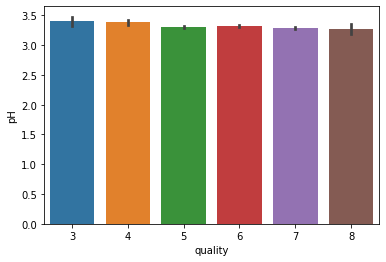

In [21]:
sns.barplot(x='quality', y='pH', data=winered_df)

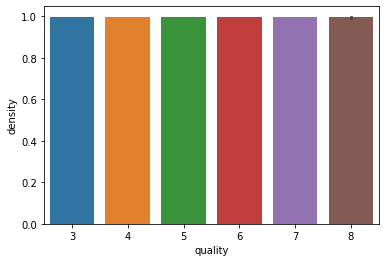

In [22]:
sns.barplot(x='quality', y='density', data=winered_df)

In [23]:
#relationship of features with each other
corr_mat=winered_df.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


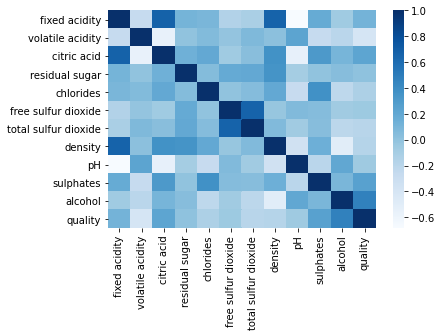

In [24]:
sns.heatmap(data=corr_mat,cmap='Blues')

In [25]:
#0 is for bad quality of wine & 1 is for good quality of wine
winered_df['quality']=winered_df['quality'].map({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})

In [26]:
#splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_df, winered_df['quality'], test_size = 0.3, random_state = 10)

In [27]:
#using training set to create a decision tree model
wine_tree=DecisionTreeClassifier(criterion='gini',random_state=10)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [28]:
#predicting y values using testing set
y_pred=wine_tree.predict(X_test)

In [29]:
acc=accuracy_score(y_test,y_pred)*100
print('Accuuracy of the model predicting quality of wine:',acc)

Accuuracy of the model predicting quality of wine: 74.375
